<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/23%20-%20Sklearn%20Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 23/30 Sklearn : Feature Selection

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Variance Threshold

In [0]:
from sklearn.feature_selection import VarianceThreshold

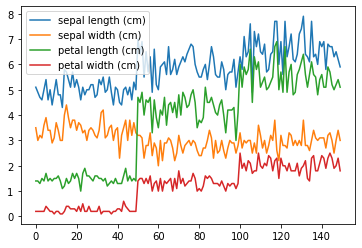

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [9]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [11]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)

VarianceThreshold(threshold=0.2)

In [12]:
selector.get_support()

array([ True, False,  True,  True])

In [13]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [14]:
selector.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

## 2. SelectKBest

In [0]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [16]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [19]:
selector = SelectKBest(f_classif, k=2)
selector.fit(X, y)
selector.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [23]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

## 3. Recursive feature Elimination

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [24]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[2 1 1 1]
[0.8        0.84666667 0.77333333]


In [25]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

## 4. SelectFromModel

In [0]:
from sklearn.feature_selection import SelectFromModel

In [27]:
X = iris.data
y = iris.target
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit(X, y)
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [29]:
np.array(iris.feature_names)[selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')